In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2020.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.521452
0    0.478548
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.56
0    0.44
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
228,ATL,34.566667,5.800000,9.266667,5.633333,5.734833,3.983333,9.550000,39.066667,0.260583,...,10.423729,13.169492,6.220339,0.0,48.932203,1.576271,0.322034,-0.028119,-0.679661,1
229,TOR,33.950000,5.266667,8.766667,5.016667,5.028833,3.500000,8.450000,38.083333,0.254117,...,11.550000,14.616667,7.800000,0.0,47.166667,1.966667,0.450000,0.021800,0.136667,1
230,SFG,33.559322,4.932203,8.762712,4.813559,5.009661,3.305085,8.559322,37.627119,0.252678,...,11.593220,13.220339,6.389831,0.0,46.474576,1.762712,0.661017,-0.109271,-1.032203,0
231,SDP,32.716667,5.316667,8.266667,5.116667,5.237333,3.350000,8.266667,36.966667,0.248250,...,9.900000,14.516667,6.516667,0.0,51.700000,1.465517,0.500000,0.011367,0.336667,1
232,ARI,33.283333,4.483333,8.033333,4.250000,4.340333,3.016667,7.683333,37.300000,0.236033,...,10.152542,15.186441,7.542373,0.0,48.050847,1.689655,0.603448,-0.026932,-0.352542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,PIT,32.150000,3.716667,7.083333,3.583333,3.340167,2.783333,8.566667,35.566667,0.215300,...,11.066667,13.416667,6.916667,0.0,49.083333,1.083333,0.400000,-0.020317,-0.321667,1
299,NYM,33.683333,4.850000,9.116667,4.700000,4.760500,3.366667,8.350000,38.033333,0.263500,...,11.083333,14.483333,7.350000,0.0,49.650000,1.220339,0.423729,0.035733,0.156667,0
300,STL,30.120690,3.896552,6.879310,3.758621,4.199483,3.637931,8.396552,34.620690,0.221172,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,0
301,STL,30.120690,3.896552,6.879310,3.758621,4.199483,3.637931,8.396552,34.620690,0.221172,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,1


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.683333,4.850000,9.116667,4.70000,4.760500,3.366667,8.350000,38.033333,0.263500,...,11.416667,13.866667,6.883333,0.0,50.000000,1.833333,0.666667,-0.042900,-1.010000,1
1,TBR,33.016667,4.750000,7.833333,4.50000,4.548667,4.033333,10.166667,37.716667,0.232217,...,11.266667,13.900000,6.783333,0.0,49.100000,2.000000,0.750000,-0.044417,-0.423333,0
2,CHW,34.116667,5.100000,8.900000,4.90000,4.962500,2.983333,9.516667,37.783333,0.253000,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,0
3,OAK,31.816667,4.683333,7.200000,4.50000,4.827000,4.000000,8.783333,36.733333,0.223967,...,10.150000,14.983333,7.200000,0.0,46.750000,1.610169,0.372881,0.031567,0.041667,1
4,LAD,33.983051,5.779661,8.661017,5.40678,5.466610,3.779661,7.881356,38.525424,0.252119,...,10.152542,15.186441,7.542373,0.0,48.050847,1.689655,0.603448,-0.026932,-0.352542,1


In [13]:
#for col in X_train.columns:
    #print(col)

In [14]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [15]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
228,ATL,34.566667,5.800000,9.266667,5.633333,5.734833,3.983333,9.550000,39.066667,0.260583,...,10.423729,13.169492,6.220339,0.0,48.932203,1.576271,0.322034,-0.028119,-0.679661,1
229,TOR,33.950000,5.266667,8.766667,5.016667,5.028833,3.500000,8.450000,38.083333,0.254117,...,11.550000,14.616667,7.800000,0.0,47.166667,1.966667,0.450000,0.021800,0.136667,1
230,SFG,33.559322,4.932203,8.762712,4.813559,5.009661,3.305085,8.559322,37.627119,0.252678,...,11.593220,13.220339,6.389831,0.0,46.474576,1.762712,0.661017,-0.109271,-1.032203,0
231,SDP,32.716667,5.316667,8.266667,5.116667,5.237333,3.350000,8.266667,36.966667,0.248250,...,9.900000,14.516667,6.516667,0.0,51.700000,1.465517,0.500000,0.011367,0.336667,1
232,ARI,33.283333,4.483333,8.033333,4.250000,4.340333,3.016667,7.683333,37.300000,0.236033,...,10.152542,15.186441,7.542373,0.0,48.050847,1.689655,0.603448,-0.026932,-0.352542,1


In [17]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [18]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [19]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [20]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [21]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

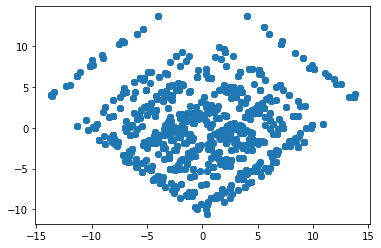

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [15]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [16]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

### All Feats

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.5345355191256831
Train Mean Accuracy: 0.5676567656765676
Test Mean Accuracy: 0.5733333333333334
Recall Score: 0.6666666666666666
Precision Score: 0.6086956521739131
F1 Score: 0.6363636363636365


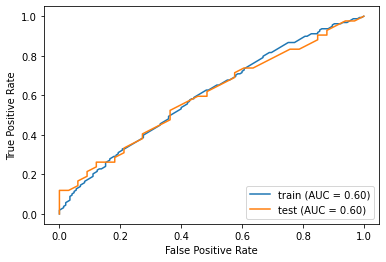

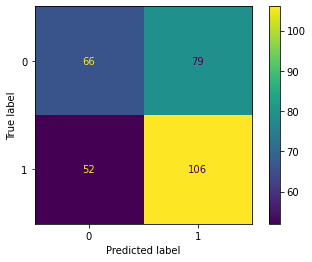

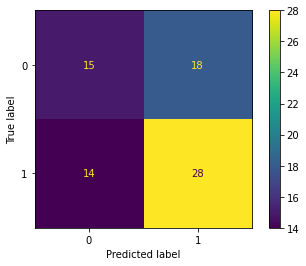

In [17]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [22]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [19]:
new_acc(probabilities)

(0.7142857142857143, 10)

### Home_win, zero imp
***

In [23]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [24]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5279234972677596
Train Mean Accuracy: 0.5676567656765676
Test Mean Accuracy: 0.5733333333333334
Recall Score: 0.6666666666666666
Precision Score: 0.6086956521739131
F1 Score: 0.6363636363636365


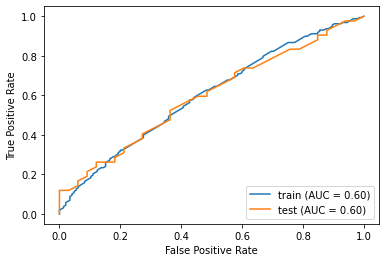

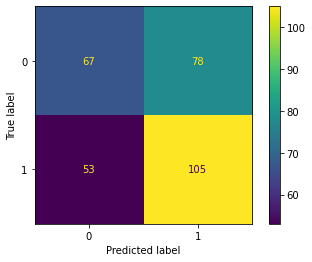

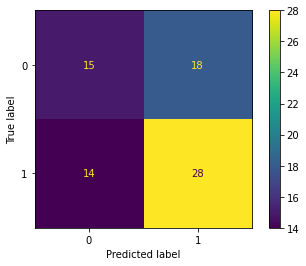

In [25]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [26]:
new_acc(probabilities)

(0.7142857142857143, 10)

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN, all feats

Number of Neighbors: 9
Metric: minkowski
Weights: uniform
Mean Cross-Val Score: 0.5181967213114754
Train Mean Accuracy: 0.570957095709571
Test Mean Accuracy: 0.5733333333333334
Recall Score: 0.6904761904761905
Precision Score: 0.6041666666666666
F1 score: 0.6444444444444444


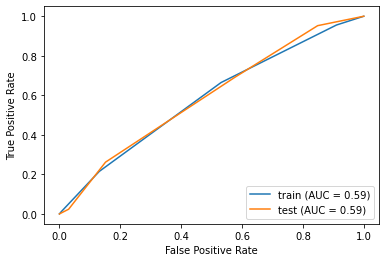

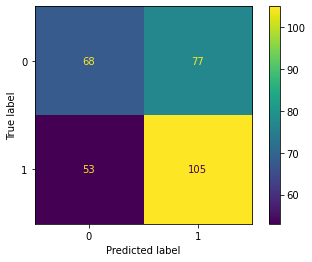

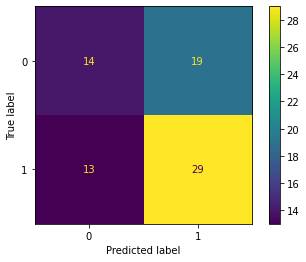

In [20]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [21]:
new_acc(probabilities)

(0.6956521739130435, 16)

### zero imp

Number of Neighbors: 11
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.528032786885246
Train Mean Accuracy: 0.5742574257425742
Test Mean Accuracy: 0.5733333333333334
Recall Score: 0.6904761904761905
Precision Score: 0.6041666666666666
F1 score: 0.6444444444444444


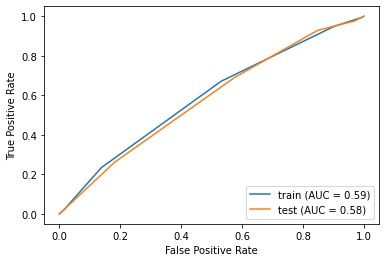

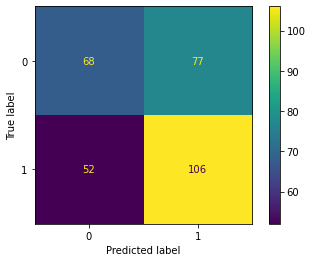

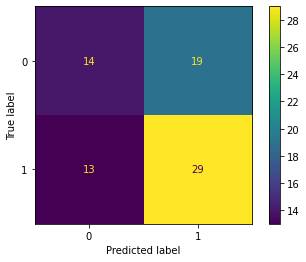

In [27]:
prediction,probabilities=knn(zero_imp_train,zero_imp_test,y_train,y_test)

In [28]:
new_acc(probabilities)

(0.64, 16)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


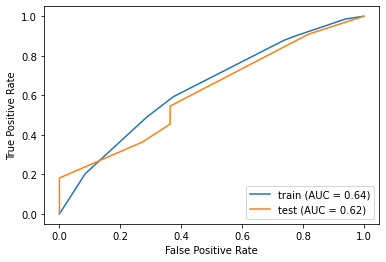

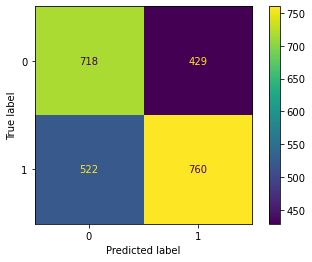

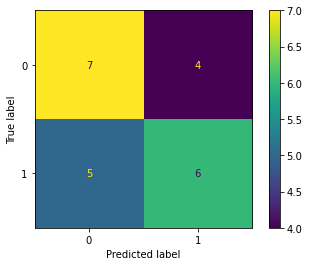

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

### model

In [29]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


### All feats

In [23]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 100
criterion: entropy
Mean Cross-Val Score: 0.45513661202185796
Train Mean Accuracy: 0.6105610561056105
Test Mean Accuracy: 0.64
Recall Score: 0.6190476190476191
Precision Score: 0.7027027027027027
F1 score: 0.6582278481012659


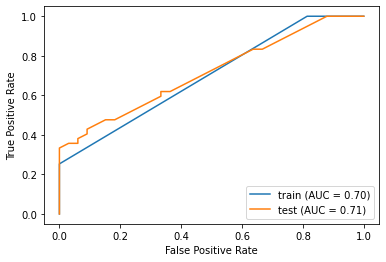

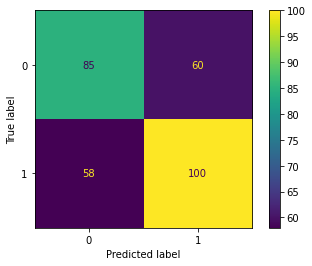

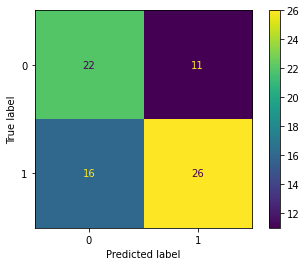

In [24]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [26]:
new_acc(probabilities)

(1.0, 18)

### Zero imp

In [30]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

Number of Trees: 125
criterion: gini
Mean Cross-Val Score: 0.4419672131147541
Train Mean Accuracy: 0.6105610561056105
Test Mean Accuracy: 0.6266666666666667
Recall Score: 0.6428571428571429
Precision Score: 0.675
F1 score: 0.6585365853658537


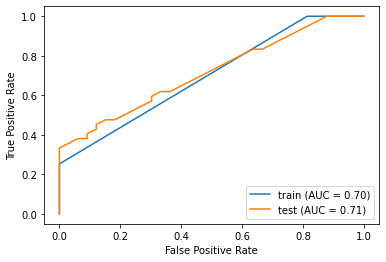

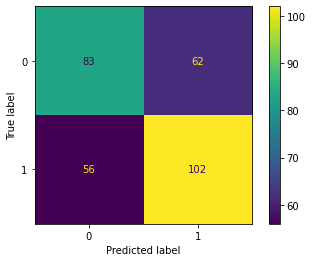

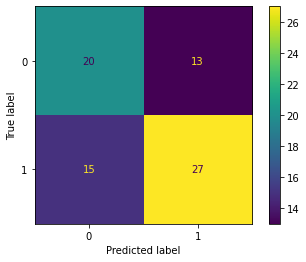

In [31]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [32]:
new_acc(probabilities)

(1.0, 17)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


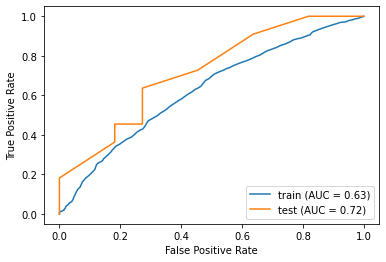

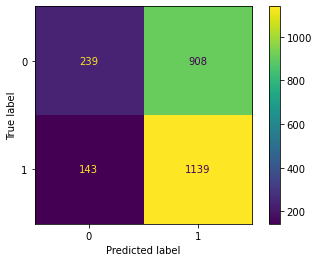

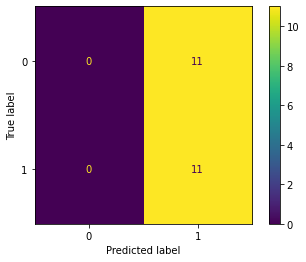

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


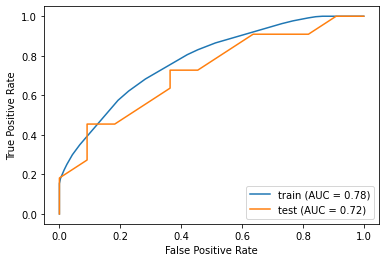

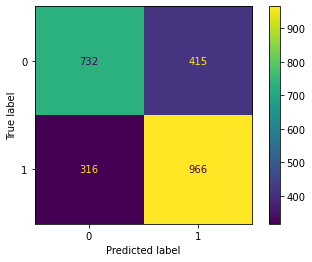

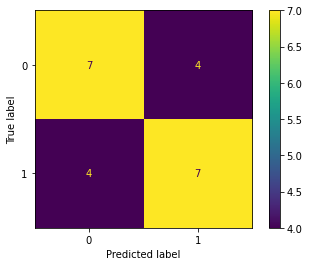

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)